# VI-ME-RÉ-BAR sur vos propres données!

**Instructions**:

Notre jeu de données est composé de 0 et 1 monochromes (en noir).On pense que plusieurs attributs pourraient permettent de distinguer les 0 des 1, comme l'élongation,la présence ou non de boucle ou encore le nombre de bandes verticales noires mesurées au centre de l'image.

In [1]:
!pip install pillow pandas numpy sklearn matplotlib seaborn

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%load_ext autoreload
%autoreload 2

from utilities import *

In [3]:
# Load general libraries
import os, re
from glob import glob as ls
import numpy as np                    # Matrix algebra library
import pandas as pd                   # Data table (DataFrame) library
import seaborn as sns; sns.set()      # Graphs and visualization library
from PIL import Image                 # Image processing library
import matplotlib.pyplot as plt       # Library to make graphs 
from typing import Union
# Command to insert the graphs in line in the notebook:
%matplotlib inline

# Reload code when changes are made
%load_ext autoreload
%autoreload 2

# Import utilities
from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Étape 1: prétraitement et [VI]sualisation

Le jeu de données consiste en les images suivantes:

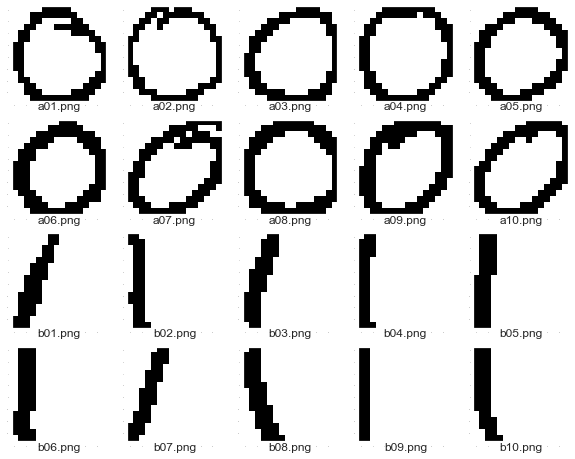

In [4]:
images = load_images("./data/original/", "*.png")
image_grid(images, titles=images.index)

In [5]:
assert isinstance(images, pd.Series)
assert len(images) == 20

### Prétraitement

Les données sont très souvent prétraitées c'est-à-dire **résumées
selon différentes caractéristiques** : chaque élément du jeu de
données est décrit par un ensemble [**d'attributs**](https://en.wikipedia.org/wiki/Feature_(machine_learning))
-- propriétés ou caractéristiques mesurables de cet élément ; pour un
animal, cela peut être sa taille, sa température corporelle, etc.

C'est également le cas dans notre jeu de données : une image est
décrite par le couleur de chacun de ses pixels. Cependant les pixels
sont trop nombreux pour nos besoins. Nous voulons comme la semaine
dernière les remplacer par quelques attributs mesurant quelques
propriétés essentielles de l'image, comme sa couleur ou sa forme
moyenne: ce sont les données prétraitées.

La semaine dernière, les données prétraitées vous ont été fournies
pour les pommes et les bananes.
Cette semaine, grâce aux trois feuilles précédentes, vous avez les
outils et connaissances nécessaires pour effectuer le prétraitement 
directement vous-même:

- la feuille de rappel sur la [gestion de tableaux](1_tableaux.md); 
- la feuille sur le [traitement des images](2_images.md);
- la feuille sur l'[extraction d'attributs](3_extraction_d_attributs.md).

Pour commencer, la table prétraitée contient les attributs `redness`
et `elongation` -- tels que vous les avez défini dans la feuille
[extraction d'attributs](3_extraction_d_attributs.md) -- appliqués à
votre jeu de données":

#### Élongation

`elongation()` est deja un premier critère pour separer les 0 et les 1.

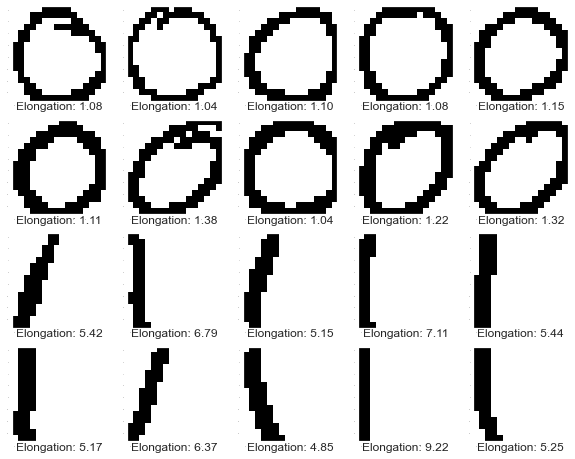

In [6]:
image_grid(images, 
           titles=["Elongation: {0:.2f}".format(elongation(img)) for img in images])

#### Boucles

On implemente `boucle()` qui renvoie `True` si l'image en question (supposee noir sur blanc), contient une boucle.
C'est un algorithme recurssif, qui partant d'un pixel blanc, cherche un chemin vers une extremite, le tout en renvoyant des valeurs booleennes.

In [7]:
show_source(entouree)

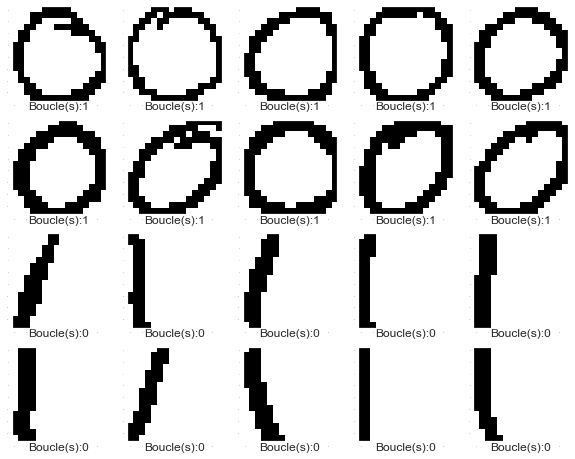

In [8]:
image_grid(images, 
           titles=["Boucle(s):{0:.0f}".format(entouree(images[i], (7,7), [])) for i in range(len(images))])

In [9]:
show_source(boucle)

Petite visualisation du traitement effectué par l'algorithme récursif

In [10]:
nimages = []
for i in range(len(images)):
    test_img = images[i].copy()
    b, colored = boucle(test_img)
    w, h = test_img.size
    for px in range(w):
        for py in range(h):
            if (px,py) in colored and test_img.getpixel((px,py))==(255,255,255,255):
                test_img.putpixel((px,py), (255,0,0,255))
    nimages.append(test_img)

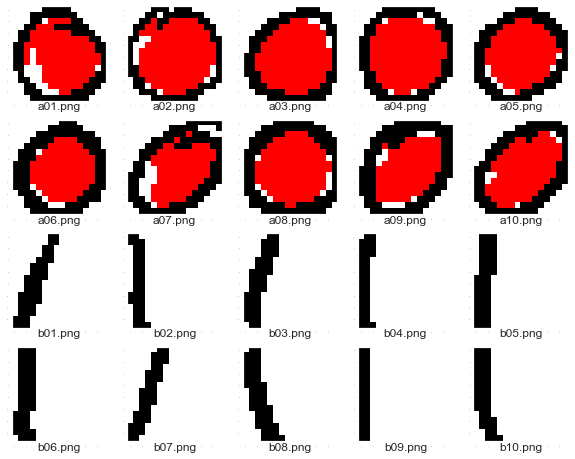

In [11]:
image_grid(nimages, titles=images.index)

#### Nombre de bandes 

On implemente `nb_bandes_zero()` qui renvoie un score proportionel au nombre de lignes contenant deux bandes noires verticales dans une image. 

In [12]:
show_source(nb_bandes_zero)

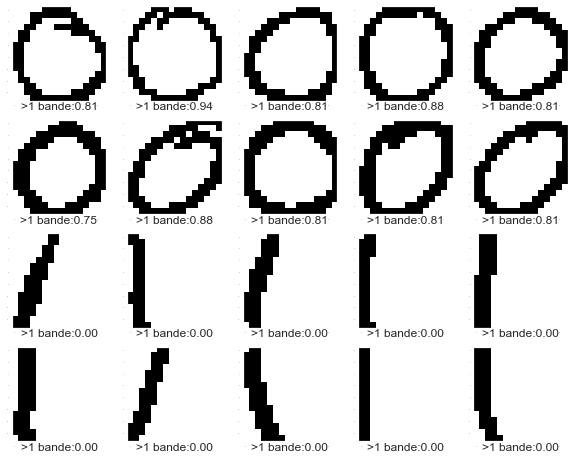

In [13]:
image_grid(images, 
           titles=[">1 bande:{0:.2f}".format(nb_bandes_zero(images[i])) for i in range(len(images))])

#### Diffusion des pixels
On effectue une rotation de 90 degrés, puis on récupère tous les pixel noirs(leurs positions) et on trace un nuage de points.
En effectuant une régression linéaire, on obtient le ESS:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  La somme totale des carrés des différences entre données expérimentales et prédictions de la régression.
$$
ESS = \sum_{i=1}^{n} (y_i - (a*x_i + b))^2
$$

où $y_i$ et $x_i$ sont les valeurs expérimentales,

$a$ et $b$ sont les coefficients obtenues par régression linéaire. 
<br><br>
$$
    a =\frac{\sum_{}^{} (x_i - \bar{x})*(y_i - \bar{y})}{\sum_{(x_i - \bar{x})^2}}
    \>\>,\>\>\>\>\>\>\>\>\>\>\>\>\>\>\>\>
    b = \bar{y} - a*\bar{x}
$$
où $\bar{x}$ et $\bar{y}$ sont les moyennes des échantillons respectifs.

In [14]:
show_source(linreg)

In [15]:
images_rotations = [img.transpose(Image.ROTATE_90) for img in images]

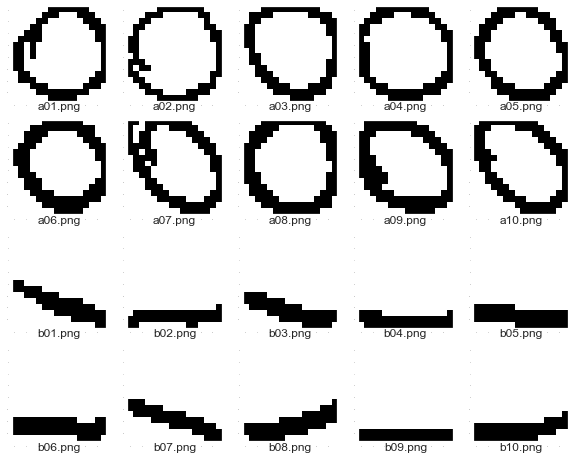

In [16]:
image_grid(images_rotations, 
           titles=images.index)

38.45228094168213


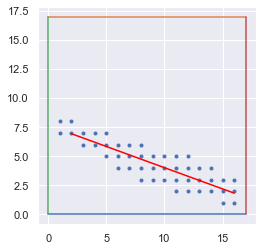

In [17]:
tstimg = np.array(images_rotations[10])
black = [(16-px,py+1) for px in range(len(tstimg)) for py in range(len(tstimg[px])) if list(tstimg[px][py])!=[255,255,255,255]]
xs = [point[1] for point in black]
ys = [point[0] for point in black]
a,b,r,ess = linreg(xs,ys)
abcisse = list(range(2,17))
ordonnee = [a * x + b for x in abcisse]
plt.plot([0,17],[0,0])
plt.plot([0,17],[17,17])
plt.plot([0,0],[0,17])
plt.plot([17,17],[17,0])
plt.axis('square')
plt.plot(abcisse, ordonnee, color="red")
plt.scatter(xs,ys, marker=".")
print(ess)

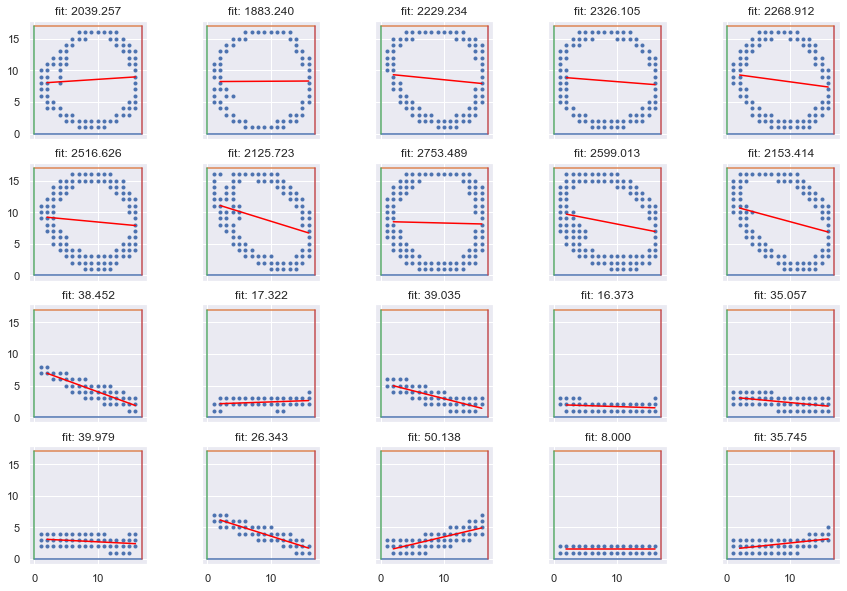

<Figure size 432x288 with 0 Axes>

In [18]:

fig, ax = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(15,10))
fig = plt.figure()
esss = []
for i in range(4):
    for j in range(5):
        tstimg = np.array(images_rotations[i*5+j])
        black = [(16-px,py+1) for px in range(len(tstimg)) for py in range(len(tstimg[px])) if list(tstimg[px][py])!=[255,255,255,255]]
        xs = [point[1] for point in black]
        ys = [point[0] for point in black]
        a,b,r,ess = linreg(xs,ys)
        abcisse = list(range(2,17))
        ordonnee = [a * x + b for x in abcisse]
        ax[i, j].plot([0,17],[0,0])
        ax[i, j].plot([0,17],[17,17])
        ax[i, j].plot([0,0],[0,17])
        ax[i, j].plot([17,17],[17,0])
        ax[i, j].axis('square')
        ax[i, j].plot(abcisse, ordonnee, color="red")
        ax[i, j].scatter(xs,ys, marker=".")
        ax[i, j].title.set_text("fit: {0:.3f}".format(ess))
        esss.append(ess)
        #ax[i, j].plot(xs,ys)

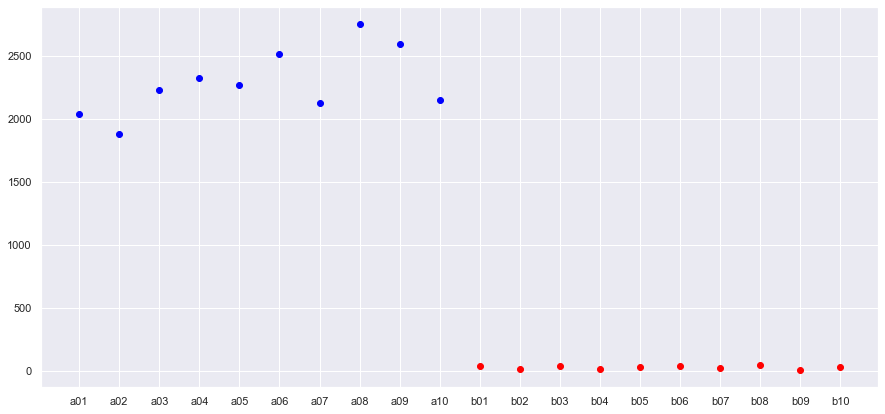

In [19]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.scatter([images.index[i][:-4] for i in range(10)],esss[:10], color='blue')
plt.scatter([images.index[i][:-4] for i in range(10,20)],esss[10:], color='red')


2. Comment les avez-vous choisis?

    Les uns sont plus allongés que les zéros.
    
    Les zéros et les uns ont pour différence principale la présence ou pas de boucle.
    
    Le nombre de bandes verticales est aussi un facteur indicateur de zéros ou de uns.
    
    Les uns ressemblent à des lignes horizontales une fois tournés a 90%, on applique une régression linéaire, et on récupère le ESS : la somme totale des carrées des différences entre données et prédictions.


In [20]:
df = pd.DataFrame()
#df["images"] = [images.index[i] for i in range(len(images))]
df["class"] = [1 if name.startswith('a') else -1 for name in images.index]
df["centree linreg"] = esss
df["elongation"] = [elongation(images[i]) for i in range(len(images))]
df["Boucle"] = [float(boucle(images[i])[0]) for i in range(len(images))]
df["Bandes verticales"] = [nb_bandes_zero(images[i]) for i in range(len(images))]
df

,class,centree linreg,elongation,Boucle,Bandes verticales
0,1,2039.257041,1.077167,1.0,0.8125
1,1,1883.239548,1.043389,1.0,0.9375
2,1,2229.233655,1.104132,1.0,0.8125
3,1,2326.105350,1.081712,1.0,0.8750
4,1,2268.912001,1.147618,1.0,0.8125
5,1,2516.625885,1.106545,1.0,0.7500
6,1,2125.722923,1.375925,1.0,0.8750
7,1,2753.489345,1.037704,1.0,0.8125
8,1,2599.012686,1.219250,1.0,0.8125
9,1,2153.414034,1.320711,1.0,0.8125


Vérifications:
- la table d'origine est préservée:

In [21]:
assert len(df[df['class'] ==  1]) == 10
assert len(df[df['class'] == -1]) == 10
#assert 'redness' in df.columns
assert 'elongation' in df.columns

- Nouveaux attributs: Bandes verticales, Boucles, Diffusion

In [22]:
assert len(df.columns) > 3, "Ajoutez au moins un attribut!"
assert df.notna().all(axis=None), "Valeurs manquantes!"
for attribute in df.columns[3:]:
    assert pd.api.types.is_numeric_dtype(df[attribute]), \
        f"L'attribut {attribute} n'est pas numérique"

In [23]:
assert len(df.columns) > 4, "Gagnez un point en ajoutant un autre attribut"

Standardisation  des colonnes à l'exception de la colonne
`class`, afin de calculer les corrélations entre colonnes

In [24]:
df_classless = df.copy()
dfstd  = (df_classless - df_classless.mean())/df_classless.std()
#dfstd["redness"] = df["redness"]
dfstd["class"] = df["class"]
dfstd

,class,centree linreg,elongation,Boucle,Bandes verticales
0,1,0.749343,-0.942451,0.974679,0.927516
1,1,0.616367,-0.955000,0.974679,1.219647
2,1,0.911264,-0.932434,0.974679,0.927516
3,1,0.993829,-0.940763,0.974679,1.073581
4,1,0.945082,-0.916280,0.974679,0.927516
5,1,1.156213,-0.931538,0.974679,0.781450
6,1,0.823040,-0.831469,0.974679,1.073581
7,1,1.358096,-0.957111,0.974679,0.927516
8,1,1.226433,-0.889670,0.974679,0.927516
9,1,0.846641,-0.851979,0.974679,0.927516


Vérifions :

In [25]:
assert dfstd.shape == df.shape
assert dfstd.index.equals(df.index)
assert dfstd.columns.equals(df.columns)
assert (abs(dfstd.mean()) < 0.01).all()
assert (abs(dfstd.std() - 1) < 0.1).all()

Le prétraitement est terminé!

### Visualisation

In [26]:
dfstd.describe()

,class,centree linreg,elongation,Boucle,Bandes verticales
count,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
mean,0.000000,-9.992007e-17,-2.775558e-17,-1.110223e-17,1.110223e-17
std,1.025978,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.000000,-9.819311e-01,-9.571113e-01,-9.746794e-01,-9.713356e-01
25%,-1.000000,-9.584302e-01,-9.317623e-01,-9.746794e-01,-9.713356e-01
50%,0.000000,-1.648245e-01,-1.871056e-01,0.000000e+00,-9.494257e-02
75%,1.000000,9.197184e-01,6.728359e-01,9.746794e-01,9.275159e-01
max,1.000000,1.358096e+00,2.082290e+00,9.746794e-01,1.219647e+00


**Exercice :**
- Visualisez le tableau de données sous forme de carte de chaleur (*heat map*):

<AxesSubplot:>

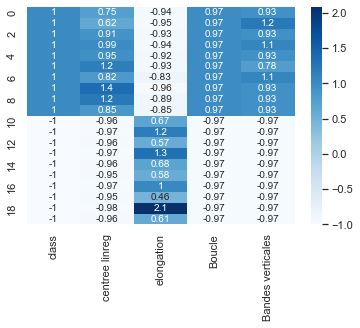

In [27]:
sns.heatmap(dfstd, cmap="Blues", annot=True)

- sa matrice de corrélation:

In [28]:
# YOUR CODE HERE
corr=dfstd.corr()
corr

,class,centree linreg,elongation,Boucle,Bandes verticales
class,1.000000,0.987638,-0.938636,1.000000,0.996569
centree linreg,0.987638,1.000000,-0.930166,0.987638,0.976605
elongation,-0.938636,-0.930166,1.000000,-0.938636,-0.935463
Boucle,1.000000,0.987638,-0.938636,1.000000,0.996569
Bandes verticales,0.996569,0.976605,-0.935463,0.996569,1.000000


<AxesSubplot:>

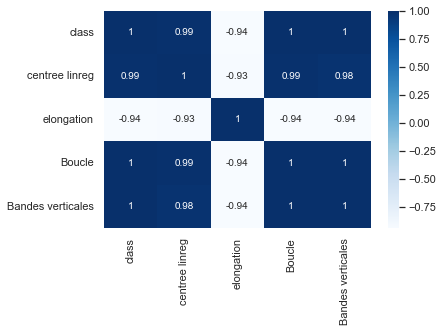

In [29]:
# YOUR CODE HERE
sns.heatmap(corr, cmap="Blues", annot=True)

- ainsi que le nuage de points (*scatter plot*):

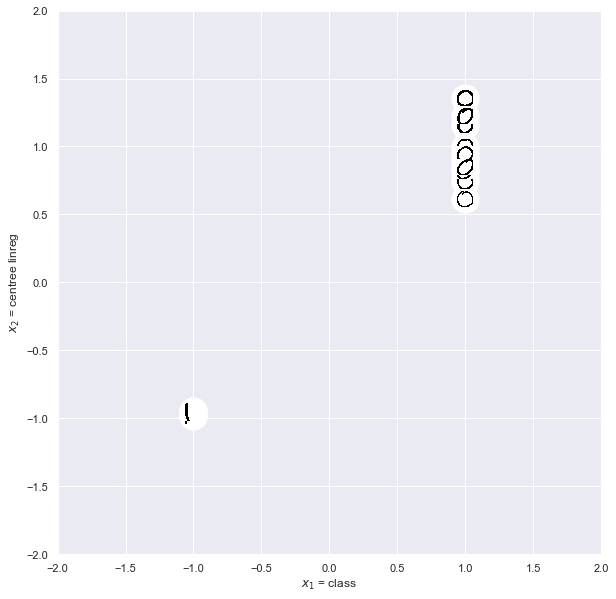

In [30]:
make_scatter_plot(dfstd,images,axis="square")

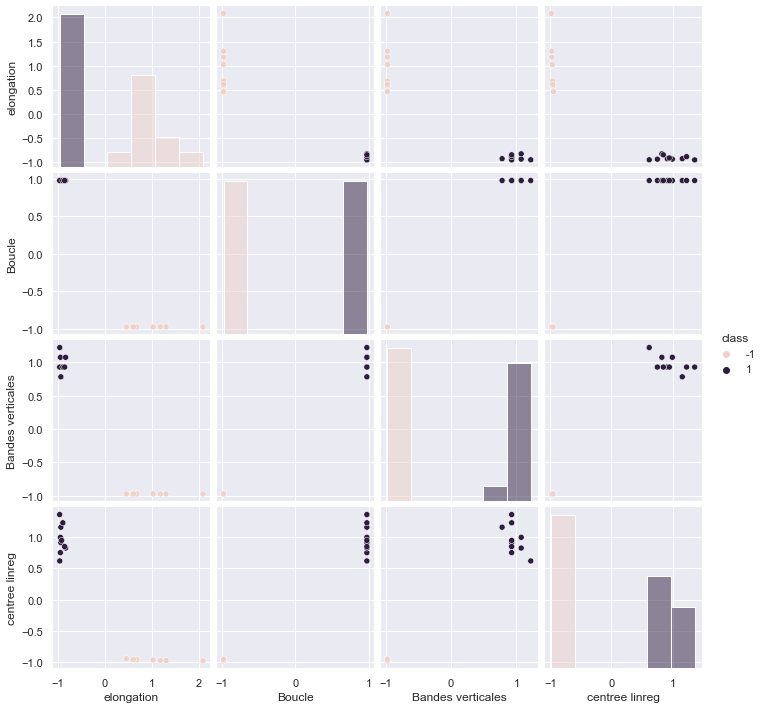

In [31]:
sns.pairplot(dfstd,hue='class',diag_kind="hist",vars = ['elongation','Boucle','Bandes verticales','centree linreg'])

### Observations

**Exercice :** Décrivez ici vos observations: corrélations apparentes
ou pas, interprétation de ces corrélations à partir du nuage de
points, etc. Est-ce que les attributs choisis semblent suffisants?
Quel attribut semble le plus discriminant? Est-ce qu'un seul d'entre
eux suffirait?

On observe que comme attendu le pairplot est symétrique.De plus il semblerait que les attributs bandes verticales et centree linreg permettent efficacement de classifier le jeux de données

## Étape 2: [ME]sure de performance (*[ME]tric*)

Pour mesurer les performances de ce problème de classification, nous
utiliserons la même métrique par taux d'erreur que dans le TP3:

In [32]:
show_source(error_rate)

### Partition (*split*) du jeu de données en ensemble d'entraînement et ensemble de test

Extraire, depuis `dfstd`, les deux attributs choisis dans `X` et la vérité terrain dans
`Y`:

In [33]:
X = dfstd[["Bandes verticales","centree linreg"]]
Y = dfstd["class"]
X.shape,Y.shape

((20, 2), (20,))

Ajouter un autotest que les attributs ne sont pas redness/elongation : un nouvel attribut ; deux nouveaux attributs

In [34]:
assert isinstance(X, pd.DataFrame), "X n'est pas une table Pandas"
assert X.shape == (20,2), "X n'est pas de la bonne taille"
assert set(X.columns) != {'redness', 'elongation'}

In [35]:
assert 'redness' not in X.columns and 'elongation' not in X.columns, \
   "Pour un point de plus: ne réutiliser ni la rougeur, ni l'élongation"

**Exercice :** Maintenant partitionnez l'index des images en ensemble
d'entraînement (`train_index`) et ensemble de test
(`test_index`). Récupérez les attributs et classes de vos images selon
l'ensemble d'entraînement `(Xtrain, Ytrain)` et celui de test `(Xtest,
Ytest)`.

In [36]:
train_index, test_index = split_data(X, Y,verbose = True, seed=0)
train_index, test_index

TRAIN: [14 19  2 11  3 18 12  5  9  1] TEST: [ 0 17  4 13  6  8  7 16 10 15]


(array([14, 19,  2, 11,  3, 18, 12,  5,  9,  1], dtype=int64),
 array([ 0, 17,  4, 13,  6,  8,  7, 16, 10, 15], dtype=int64))

In [37]:
Xtrain = X.iloc[train_index]
Xtest = X.iloc[test_index]
Ytrain = Y.iloc[train_index]
Ytest = Y.iloc[test_index]

In [38]:
assert train_index.shape == test_index.shape
assert list(sorted(np.concatenate([train_index, test_index]))) == list(range(20))

assert Xtest.shape == Xtrain.shape
assert pd.concat([Xtest, Xtrain]).sort_index().equals(X.sort_index())

assert Ytest.shape == Ytrain.shape
assert pd.concat([Ytest, Ytrain]).sort_index().equals(Y.sort_index())
assert Ytest.value_counts().sort_index().equals(Ytrain.value_counts().sort_index())

**Exercice :** Affichez les images qui serviront à entraîner notre
modèle de prédiction (*predictive model*):

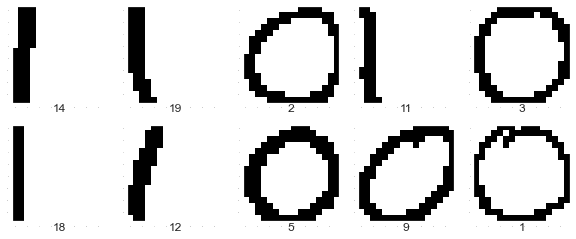

In [39]:
image_grid(images.iloc[train_index], titles=train_index)

**Exercice :** Affichez celles qui permettent de le tester et
d'évaluer sa performance:

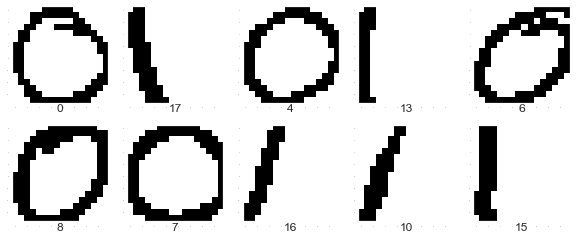

In [40]:
image_grid(images.iloc[test_index], titles=test_index)

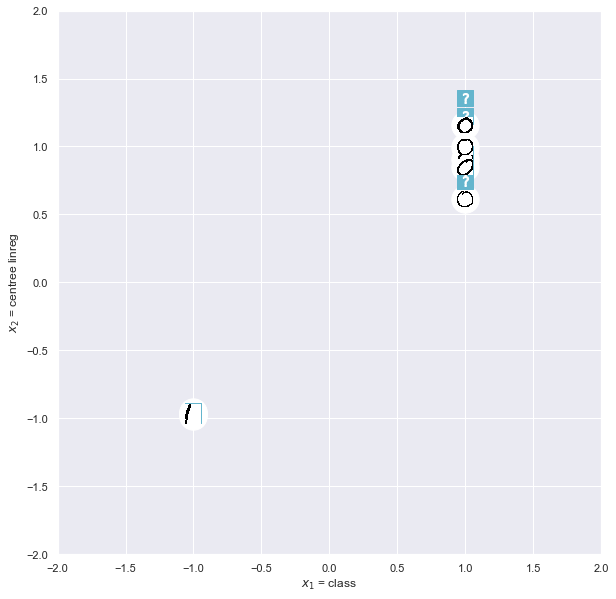

In [41]:
make_scatter_plot(dfstd, images, train_index, test_index, axis='square')

### Taux d'erreur

Comme la semaine dernière, nous utiliserons le taux d'erreur comme
métrique, d'une part sur l'ensemble d'entraînement, d'autre part sur
l'ensemble de test. Implémentez la fonction `error_rate` dans votre
utilities.py. Pour vérifier que c'est correctement fait, nous
affichons son code ci-dessous:

In [42]:
show_source(error_rate)

In [43]:
def error_rate(solutions: pd.Series, predictions: pd.Series) -> Any:
    """
    Return the error rate between two vectors.
    """
    return (solutions != predictions).mean()

## Étape 3: [RE]férence (*base line*)

### Classificateur

Classificateur du k-neighrest neighboor

In [44]:
from sklearn.neighbors import KNeighborsClassifier
modele = KNeighborsClassifier(n_neighbors=3)
modele.fit(Xtrain,Ytrain)
Ytrain_predicted = modele.predict(Xtrain)
Ytest_predicted = modele.predict(Xtest)
e_tr = error_rate(Ytrain,Ytrain_predicted)
e_te = error_rate(Ytest,Ytest_predicted)

Calcul des prédictions sur l'ensemble d'entraînement
et l'ensemble de test, ainsi que les taux d'erreur dans les deux cas:

In [45]:
print("Training error:", e_tr)
print("Test error:", e_te)

Training error: 0.0
Test error: 0.0


In [46]:
assert Ytrain_predicted.shape == Ytrain.shape
assert Ytest_predicted.shape == Ytest.shape
assert 0 <= e_tr and e_tr <= 1
assert 0 <= e_te and e_te <= 1

Visualisons les prédictions obtenues:

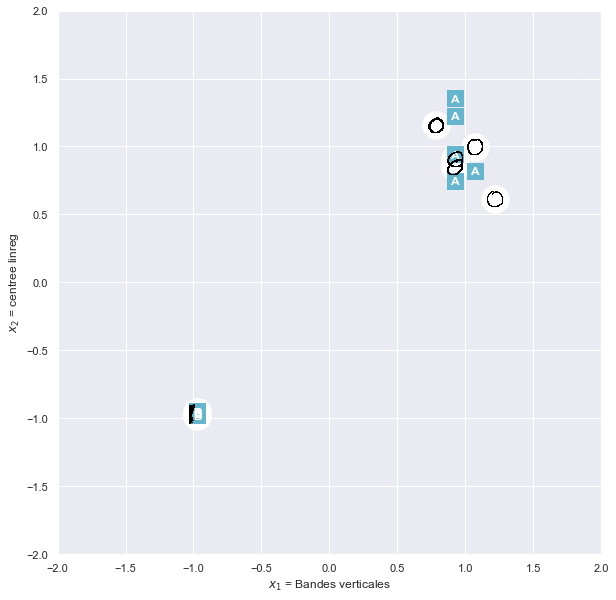

In [47]:
# The training examples are shown as white circles and the test examples are black squares.
# The predictions made are shown as letters in the black squares.
make_scatter_plot(X, images.apply(transparent_background_filter),
                  train_index, test_index, 
                  predicted_labels=Ytest_predicted, axis='square')

### Interprétation

Les prédictions sont très satisfaisantes étant donnée que le taux d'erreurs à l'entrainement et au test est de 0%.Pour l'améliorer on pourrait utiliser.Pour améliorer la performance de l'algorithme de classification on pourrait utiliser la méthode de classification OneRule pour créer une "frontière" de séparation entre les zéros et les 1 selon la droite passant par les points (1,0) et (0,1) du graphique ci-dessus.

Classificateur fenetre de Parszen

In [48]:
from sklearn.neighbors import RadiusNeighborsClassifier

#défintion du modèle et ajustement
parzen_model = RadiusNeighborsClassifier(radius=3)
parzen_model.fit(Xtrain, Ytrain)

#prédictions
Ytrain_predicted = parzen_model.predict(Xtrain)
Ytest_predicted = parzen_model.predict(Xtest)

# Calcul des erreurs
e_tr = error_rate(Ytrain, Ytrain_predicted)
e_te = error_rate(Ytest, Ytest_predicted)

print("CLASSIFICATEUR DES FENETRES DE PARZEN")
print("Training error:", e_tr)
print("Test error:", e_te)

CLASSIFICATEUR DES FENETRES DE PARZEN
Training error: 0.5
Test error: 0.4


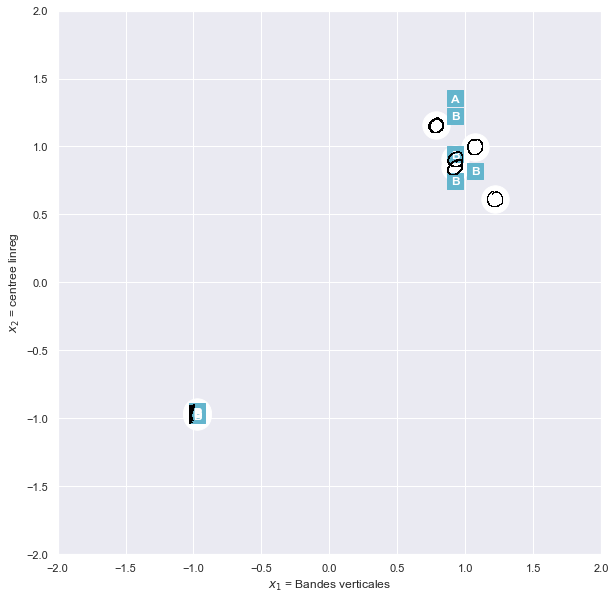

In [49]:
make_scatter_plot(X, images.apply(transparent_background_filter),
                  train_index, test_index, 
                  predicted_labels=Ytest_predicted, axis='square')

## Étape 4: [BAR]res d'erreur (*error bar*)

### Barre d'erreur 1-sigma

In [50]:
sigma =  np.sqrt(e_te*(1-e_te)/len(Ytest_predicted))
print("TEST SET ERROR RATE: {0:.2f}".format(e_te))
print("TEST SET STANDARD ERROR: {0:.2f}".format(sigma))

TEST SET ERROR RATE: 0.40
TEST SET STANDARD ERROR: 0.15


### Barre d'erreur par validation croisée (Cross-Validation)

Nous calculons maintenant une autre estimation de la barre d'erreur en
répétant l'évaluation de performance pour de multiples partitions
entre ensemble d'entraînement et ensemble de test :

In [51]:
n_te = 10
SSS = StratifiedShuffleSplit(n_splits=n_te, test_size=0.5, random_state=5)
E = np.zeros([n_te, 1])
k = 0
for train_index, test_index in SSS.split(X, Y):
    print("TRAIN:", train_index, "TEST:", test_index)
    neigh = KNeighborsClassifier(n_neighbors=3)
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index], Y.iloc[test_index]
    neigh.fit(Xtrain, Ytrain.ravel()) 
    Ytrain_predicted = neigh.predict(Xtrain)
    Ytest_predicted = neigh.predict(Xtest)
    e_tr = error_rate(Ytrain, Ytrain_predicted)
    e_te = error_rate(Ytest, Ytest_predicted)
    print("TRAIN ERROR RATE:", e_tr)
    print("TEST ERROR RATE:", e_te)
    E[k] = e_te
    k = k+1
    
e_te_ave = np.mean(E)
# It is bad practice to show too many decimal digits:
print("\n\nCV ERROR RATE: {0:.2f}".format(e_te_ave))
print("CV STANDARD DEVIATION: {0:.2f}".format(np.std(E)))

sigma = np.sqrt(e_te_ave * (1-e_te_ave) / n_te)
print("TEST SET STANDARD ERROR (for comparison): {0:.2f}".format(sigma))

TRAIN: [19 14  6  3  8 12  2  5 17 15] TEST: [ 9 13 16  4  7  1 11 18 10  0]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [10 16  2 11 15  3  1  6 17  0] TEST: [14 13  7 12 18  9  5  4  8 19]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [ 4 11  5 19 12 15  9 13  8  1] TEST: [ 3 17 14  2  7 18  6 16 10  0]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [10 13 15  6  5 17  0 16  9  7] TEST: [11  3  8 14 18 19  1 12  2  4]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [19  6  5 13 14  4  8 11  0 12] TEST: [ 7 17 15 10  3 18 16  2  1  9]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [ 4  6 12  8  0 10 18  7 13 19] TEST: [ 1 16  3  2 14 15  5 17 11  9]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [10 18 12  6  7 13  8  4 14  9] TEST: [17  0 11 19  5 15  1 16  3  2]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [ 3 10  7 15  2 16  8 18  6 13] TEST: [ 9  5 19 11 14 17 12  1  4  0]
TRAIN ERROR RATE: 0.0
TEST ERROR RATE: 0.0
TRAIN: [ 3  7  8 14  1 16 15 10 12  4] T

## Conclusion

Lien vers le rapport: https://github.com/MK8BK/SDprojet_image_s2